<a href="https://colab.research.google.com/github/shyammarjit/Two_Layer_Neural_Network/blob/main/Two_Layer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
- In this assignment, you will build a two layer neural network for classification from scratch using only numpy.
- Please refer to videos on Backpropagation and one reference material shared in additional resources for the understanding required to solve this assignment

In [ ]:
""" Some functions required for testing """
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf

def create_model(D, H, C):
  il = keras.layers.Input(shape=(D,))
  hl = keras.layers.Dense(H, activation = 'relu')(il)
  ol = keras.layers.Dense(C, activation = 'softmax')(hl)
  model = keras.models.Model(inputs = [il], outputs = [ol])

  rng = np.random.RandomState(2020)
  model.layers[1].set_weights([rng.rand(D * H).reshape(D, H), rng.rand(H, )])
  model.layers[2].set_weights([rng.rand(H * C).reshape(H, C), rng.rand(C, )])
  return model

def create_inputs(N, D):
  rng = np.random.RandomState(2020)
  return rng.rand(N * D).reshape(N, D)

def set_weights_from_model(tln, test_net):
  tln.params['W1'] = test_net.layers[1].get_weights()[0]
  tln.params['b1'] = test_net.layers[1].get_weights()[1]
  tln.params['W2'] = test_net.layers[2].get_weights()[0]
  tln.params['b2'] = test_net.layers[2].get_weights()[1]
  return tln


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network. The net has an input dimension of
    D, a hidden layer dimension of H, and performs classification over C classes.
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.

    In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - softmax

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. 
        Weights are initialized to small random values and
        biases are initialized to zero. 
        Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension N of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        self.params = {}
        ### Write your code here
        self.w1=np.random.normal(0, std, input_size*hidden_size).reshape(input_size, hidden_size)
        self.b1=np.zeros(hidden_size)
        self.w2=np.random.normal(0,std,hidden_size*output_size).reshape(hidden_size,output_size)
        self.b2=np.zeros(output_size)
        self.params['W1']=self.w1
        self.params['b1']=self.b1
        self.params['W2']=self.w2
        self.params['b2']=self.b2


In [ ]:
""" Test Cases for Initialization"""
tln = TwoLayerNet(2, 3, 2)
assert tln.params['W1'].shape == (2, 3)
assert tln.params['b1'].shape == (3, )
assert tln.params['W2'].shape == (3, 2)
assert tln.params['b2'].shape == (2, )
print('Test passed', '\U0001F44D')

Test passed 👍


In [ ]:
class TwoLayerNet(TwoLayerNet):

    def softmax(self,x):
      num=np.exp(x)
      den=np.sum(num,axis=1)
      op=np.zeros(x.shape)
      for i in range(x.shape[0]):
        op[i, :]=num[i, :]/den[i]
      return op

    def forward(self, X):
      """
      Compute the output of a full forward pass of the network.
      
      First apply weights W1 and biases b1 on inputs and then apply relu non-linearity.
      Then apply weights W2 and biases b2 on hidden layer values and then apply softmax non-linearity to get the output
      
      Inputs:
      - X : Input data of shape (N, D). Each X[i] is a training sample
      
      Outputs:
      - y_out : numpy array with Outputs of shape (N, C)
      
      """
      ### Write your code here
      W1,b1,W2,b2=self.params['W1'],self.params['b1'],self.params['W2'],self.params['b2']
      a1=X.dot(W1)+b1
      #print("a1 : ",a1)
      h1=np.maximum(a1,0)
      #print("v1 : ",v1)
      a2=np.dot(h1,W2)+b2
      h2=self.softmax(a2)
      y_out=h2
      #print("y_out : ",y_out)
      return y_out

tln = TwoLayerNet(2, 4, 2)
test_net = create_model(2, 4, 2)
tln = set_weights_from_model(tln, test_net)
X = create_inputs(4, 2)
y_forward = tln.forward(X)

In [ ]:
"""Test Cases for Forward pass"""
tln = TwoLayerNet(2, 4, 2)
test_net = create_model(2, 4, 2)
tln = set_weights_from_model(tln, test_net)
X = create_inputs(4, 2)
y_forward = tln.forward(X)
assert y_forward.shape == (4, 2)
assert np.all(np.isclose(y_forward, test_net.predict(X), atol = 0.0001))
print('Test passed', '\U0001F44D')

Test passed 👍


In [ ]:
class TwoLayerNet(TwoLayerNet):
    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """
        y_pred = None

        ###########################################################################
        # TODO: Implement this function; it should be VERY simple!                #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        ### Write your code here
        y=self.forward(X)
        #print(y)
        y_pred=np.argmax(y,axis=1)
        #print(y_pred)
        return y_pred

#tln = TwoLayerNet(2, 4, 2)
#test_net = create_model(2, 4, 2)
#tln = set_weights_from_model(tln, test_net)
#X = create_inputs(4, 2)
#y_pred = tln.predict(X)

In [ ]:
""" Test Cases for predict"""
tln = TwoLayerNet(2, 4, 2)
test_net = create_model(2, 4, 2)
tln = set_weights_from_model(tln, test_net)
X = create_inputs(4, 2)
y_pred = tln.predict(X)
print(y_pred)
test_pred = np.argmax(test_net.predict(X), axis = 1)
assert np.all(np.isclose(y_pred, test_pred, atol = 0.01))
print('Test passed', '\U0001F44D')

[0 0 0 0]
Test passed 👍


#### Loss
Note: <br>
$L = -\sum{t_i \log{p_i}}$ <br>
where $p_i$ is probability score predicted by model. <br>
$t_i = 0$ for the true class $i$ and $t_i = 1$ for all other classes for a particular sample.

In [ ]:
class TwoLayerNet(TwoLayerNet):    
    def loss(self, X, y=None):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C.


        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples. (This is the mean loss over N samples)
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        H, C = W2.shape
        
        # Compute the forward pass
        scores = None
        #############################################################################
        # TODO: Perform the forward pass, computing the class scores for the input. #
        # Store the result in the scores variable, which should be an array of      #
        # shape (N, C).                                                             #
        #############################################################################
        
        
        
        ## Write your code here
        W1,b1,W2,b2=self.params['W1'],self.params['b1'],self.params['W2'],self.params['b2']
        a1=X.dot(W1)+b1
        h1=np.maximum(a1,0)
        a2=np.dot(h1,W2)+b2
        h2=self.softmax(a2)
        y_out=h2
        #print("y_out is:",y_out,y_out.shape)
        y_p = keras.utils.to_categorical(y_out,num_classes=C)
        scores=y_out

        # # Compute the loss
        loss = None
        loss_samples = np.zeros(N)
        for i in range(N):
          loss_samples[i] = -np.log(scores[i, y[i]])
        loss = np.mean(loss_samples)

        
        #############################################################################
        # TODO: Finish the forward pass, and compute the loss. This should include  #
        # both the data loss and L2 regularization for W1 and W2. Store the result  #
        # in the variable loss, which should be a scalar. Use the Categorical       #
        # Cross Entropy loss.                                                       #
        #############################################################################
      
        ### Write your code here
        y_onehot = keras.utils.to_categorical(y, num_classes=C)
        #print("y_onehot :",y_onehot)

        # Backward pass: compute gradients
        grads = {}
        da2=y_out-y_onehot
        dW2=np.matmul(h1.T, da2)
        db2=np.sum(da2,axis=0)
        dh1=da2.dot(W2.T)

        drelu = np.vectorize(lambda x: 1 if x>0 else 0)
        da1 = drelu(h1) * dh1 
        dW1=X.T@da1
        db1=np.sum(da1,axis=0)
        
        #############################################################################
        # TODO: Compute the backward pass, computing the derivatives of the weights #
        # and biases. Store the results in the grads dictionary. For example,       #
        # grads['W1'] should store the gradient on W1, and be a matrix of same size #
        #############################################################################
        
        ### Write your code here

        grads['W1']=dW1/N
        grads['b1']=db1/N
        grads['W2']=dW2/N
        grads['b2']=db2/N

        return loss, grads

In [ ]:
""" Tests for loss and gradient computation """
### First compute loss and gradients using keras
model = create_model(2, 4, 2)
X = create_inputs(4, 2)
y = np.array([0, 1, 1, 0])
y_onehot = keras.utils.to_categorical(y, 2)

optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.0, nesterov=False, name="SGD")
loss_fn = keras.losses.CategoricalCrossentropy()
batch_size = 4
train_dataset = tf.data.Dataset.from_tensor_slices((X, y_onehot))
train_dataset = train_dataset.batch(batch_size)
epochs = 1
for epoch in range(epochs):
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      y_out = model(x_batch_train, training = True)

      ## Compute loss value for this minibatch
      loss_value = loss_fn(y_batch_train, y_out)
    
    grads_model = {}
    grads_model['W1'], grads_model['b1'], grads_model['W2'], grads_model['b2'] = [dw.numpy() for dw in tape.gradient(loss_value, model.trainable_weights)]

### Compute loss and gradients using TwoLayerNet
tln = TwoLayerNet(2, 4, 2)
tln = set_weights_from_model(tln, model)
loss, grads_tln = tln.loss(X, y)

#### Now match
## Loss should be correctly computed

#print("shape of testing W1,W2,b1,b2 :",grads_model['W1'].shape,grads_model['W2'].shape,grads_model['b1'].shape,grads_model['b2'].shape)
#print("shape of predicted W1,W2,b1,b2 :",grads_tln['W1'].shape,grads_tln['W2'].shape,grads_tln['b1'].shape,grads_tln['b2'].shape)
print('grad of predicted dw1 is:',grads_tln['W1'])
print('grad of testing dw1 is:',grads_model['W1'])
assert np.isclose(loss, loss_value.numpy(), atol = 0.0001)

## Gradients should be correctly computed
assert np.all(np.isclose(grads_tln['W2'], grads_model['W2'], atol = 0.0001))
assert np.all(np.isclose(grads_tln['b2'], grads_model['b2'], atol = 0.0001))
assert np.all(np.isclose(grads_tln['W1'], grads_model['W1'], atol = 0.0001))
assert np.all(np.isclose(grads_tln['b1'], grads_model['b1'], atol = 0.0001))

print('Test passed', '\U0001F44D')

grad of predicted dw1 is: [[ 0.0159359  -0.01363542 -0.01441477 -0.00818676]
 [-0.00592148  0.00506667  0.00535626  0.00304205]]
grad of testing dw1 is: [[ 0.01593591 -0.01363542 -0.01441477 -0.00818677]
 [-0.00592148  0.00506666  0.00535626  0.00304205]]
Test passed 👍


### Training

In [ ]:
class TwoLayerNet(TwoLayerNet):
    def train(self, X, y, X_val, y_val,
              learning_rate=1e-3, num_iters=100,
              batch_size=200, verbose=False):
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []

         ## Create a copy of X and shuffle it
        shuffled_indices = np.arange(X.shape[0])
        np.random.shuffle(shuffled_indices)
        dataset_size = X.shape[0]
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]


        for it in range(num_iters):

            #########################################################################
            # TODO: Create a random minibatch of training data and labels, storing  #
            # them in X_batch and y_batch respectively.                             #
            #########################################################################

            
            ### Write your code here
            
            start = (num_iters * batch_size)%dataset_size
            X_batch = X_shuffled[start: start + batch_size]
            y_batch = y_shuffled[start: start + batch_size]
            
            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch)
            loss_history.append(loss)

            #########################################################################
            # TODO: Use the gradients in the grads dictionary to update the         #
            # parameters of the network (stored in the dictionary self.params)      #
            # using stochastic gradient descent. You'll need to use the gradients   #
            # stored in the grads dictionary defined above.                         #
            #########################################################################

            
            ### Write your code here

            self.params['W1'] -= learning_rate * grads['W1']
            self.params['W2'] -= learning_rate * grads['W2']
            self.params['b1'] -= learning_rate * grads['b1']
            self.params['b2'] -= learning_rate * grads['b2']

            # Every epoch, check train and val accuracy
            if it % iterations_per_epoch == 0:
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)
                

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }


### Using these networks on datasets

### XOR
Use TwoLayerNet to train the XOR function discussed in the class

[0.007660250659506285, 0.007645386733428176, 0.007640575581149266, 0.007640969907115213, 0.007623985815721743, 0.007608900014882224, 0.007592744681684546, 0.007576028864251278, 0.0075639919347602405, 0.00754983147151784]


array([0, 1, 1, 0])

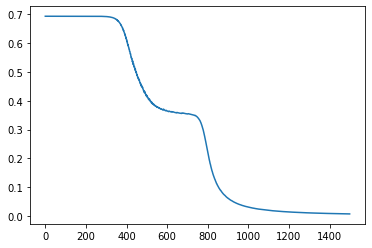

In [ ]:
### Write your code here
import matplotlib.pyplot as plt
X_exor=np.array([[0,0],[0,1],[1,0],[1,1]])
Y_exor=np.array([0,1,1,0])
net=TwoLayerNet(2,5,2)
batch_size=4
epochs=1500
lr=0.2
history=net.train(X_exor, Y_exor, X_exor, Y_exor, batch_size=batch_size,num_iters=epochs,learning_rate=lr)
plt.plot(history['loss_history'])
print(history['loss_history'][-10:])
net.predict(X_exor)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

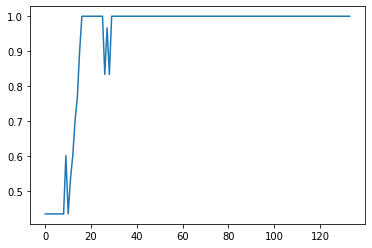

In [ ]:
plt.plot(history['val_acc_history'])
history['val_acc_history'][-10:]

### Iris
Use TwoLayerNet to train the iris dataset. Choose 120 samples randomly for training and the rest for testing

(120, 4) (120, 4)
(30, 4) (30,)
[0.01351147441174777, 0.013485715636415586, 0.01346004187417322, 0.013434452733555095, 0.013408947825384149, 0.01338352676275561, 0.013358189161021175, 0.013332934637773089, 0.013307762812828717, 0.01328267330821439]


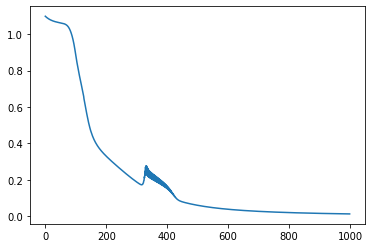

In [ ]:
### Write your code here
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X=iris.data
Y=iris.target
#print(X[:5],X.shape)
#print(Y[:5],Y.shape)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,shuffle=True)
print(X_train.shape,X_train.shape)
print(X_test.shape,Y_test.shape)
net=TwoLayerNet(4,128,3)
batch_size=10
epochs=1000
lr=0.06
history=net.train(X_train, Y_train, X_test, Y_test, batch_size=batch_size,num_iters=epochs,learning_rate=lr)
plt.plot(history['loss_history'])
print(history['loss_history'][-10:])

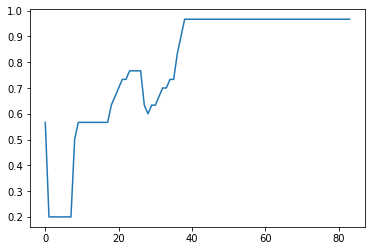

In [ ]:
plt.plot(history['val_acc_history'])

### Advanced
Add weight regularization to the loss and rewrite backprop part of TwoLayerNet. <br>
Train using some datasets and see if regularized network performs better than its older counterpart.
<br>
The expression for loss with regularization is as follows - <br>
$L = -\sum{t_i \log{p_i}} + \lambda(|w_1|^2 + |w_2|^2)$ <br>
$\lambda$ is a tunable hyper-parameter  denoting strength of regularization. <br>
If it is too high, network will struggle to fit, and if it is too low, network will overfit.

In [ ]:
## reference : https://www.kaggle.com/mtax687/l2-regularization-of-neural-network-using-numpy

class TwoLayerNet(TwoLayerNet):    
    def regularized_loss(self, X,reg_lambda,y=None): 
        ### Unpack Weights and biases
        W1,b1,W2,b2=self.params['W1'],self.params['b1'],self.params['W2'],self.params['b2']
        N, D = X.shape
        _, C = W2.shape

        ### Forward Pass
        a1=X.dot(W1)+b1
        h1=np.maximum(a1,0)
        a2=np.dot(h1,W2)+b2
        h2=self.softmax(a2)
        y_out=h2
        #print("y_out is:",y_out,y_out.shape)
        y_p = keras.utils.to_categorical(y_out,num_classes=C)
        scores=y_out

        ## Reqularised Loss Computation
        loss = None
        loss_samples = np.zeros(N)
        for i in range(N):
          loss_samples[i] = -np.log(scores[i, y[i]])
        cross_entropy_loss = np.mean(loss_samples)

        ## l2 regularization cost
        l2_regularized_loss=(np.sum(np.square(W1))+np.sum(np.square(W2)))*(reg_lambda/N)
        loss=cross_entropy_loss + l2_regularized_loss
      
        ### Write your code here
        y_onehot = keras.utils.to_categorical(y, num_classes=C)
        #print("y_onehot :",y_onehot)

        # Backward pass: compute gradients
        grads = {}
        da2=y_out-y_onehot
        dW2=np.matmul(h1.T, da2)+(2*reg_lambda)*W2
        db2=np.sum(da2,axis=0)
        dh1=da2.dot(W2.T)

        drelu = np.vectorize(lambda x: 1 if x>0 else 0)
        da1 = drelu(h1) * dh1 
        dW1=X.T@da1 + (2*reg_lambda)*W1
        db1=np.sum(da1,axis=0)
        
    # gradient updations

        grads['W1']=dW1/N
        grads['b1']=db1/N
        grads['W2']=dW2/N
        grads['b2']=db2/N

        return loss, grads

In [ ]:
class TwoLayerNet(TwoLayerNet):
    def regularized_train(self, X, y, X_val, y_val,
              learning_rate=1e-3, num_iters=100,
              batch_size=200,reg_lambda=0.5,verbose=False):
      
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        loss_history = []
        train_acc_history = []
        val_acc_history = []

         ## Create a copy of X and shuffle it
        shuffled_indices = np.arange(X.shape[0])
        np.random.shuffle(shuffled_indices)
        dataset_size = X.shape[0]
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]


        for it in range(num_iters):
            
            start = (num_iters * batch_size)%dataset_size
            X_batch = X_shuffled[start: start + batch_size]
            y_batch = y_shuffled[start: start + batch_size]
            
            # Compute loss and gradients using the current minibatch
            loss, grads = self.regularized_loss(X_batch, y=y_batch,reg_lambda=reg_lambda)
            loss_history.append(loss)

            # weight update
            self.params['W1'] -= learning_rate * grads['W1']
            self.params['W2'] -= learning_rate * grads['W2']
            self.params['b1'] -= learning_rate * grads['b1']
            self.params['b2'] -= learning_rate * grads['b2']

            # Every epoch, check train and val accuracy
            if it % iterations_per_epoch == 0:
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)
                

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }


(120, 4) (120, 4)
(30, 4) (30,)
[0.05985685792683473, 0.059849158688764906, 0.05984147846431912, 0.05983382345405258, 0.05982618393170419, 0.05981856117592033, 0.05981096094981771, 0.05980337660343194, 0.05979581012949939, 0.059788258925444836]


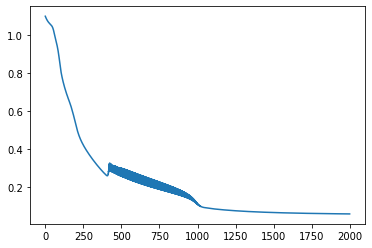

In [ ]:
# Iris Dataset with L2 regularization loss

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X=iris.data
Y=iris.target
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,shuffle=True)
print(X_train.shape,X_train.shape)
print(X_test.shape,Y_test.shape)
net=TwoLayerNet(4,128,3)
batch_size=16
epochs=2000
lr=0.05
reg_lambda=0.02
history=net.regularized_train(X_train, Y_train, X_test, Y_test, batch_size=batch_size,num_iters=epochs,learning_rate=lr,reg_lambda=reg_lambda)
plt.plot(history['loss_history'])
print(history['loss_history'][-10:])

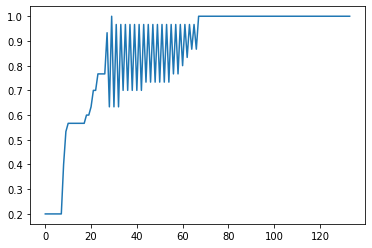

In [ ]:
plt.plot(history['val_acc_history'])